In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/users-vs-bots-classification/bots_vs_users.csv


In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/users-vs-bots-classification/bots_vs_users.csv')

In [4]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [6]:
df['target'].unique()

array([1, 0])

In [7]:
df.isna().sum()

has_domain                       0
has_birth_date                   0
has_photo                        0
can_post_on_wall                 0
can_send_message                 0
has_website                      0
gender                           0
has_short_name                   0
has_first_name                   0
has_last_name                    0
access_to_closed_profile         0
is_profile_closed                0
target                           0
has_nickname                     0
has_maiden_name                  0
has_mobile                       0
all_posts_visible                0
audio_available                  0
has_interests                    0
has_books                        0
has_tv                           0
has_quotes                       0
has_about                        0
has_games                        0
has_movies                       0
has_activities                   0
has_music                        0
can_add_as_friend                0
can_invite_to_group 

In [8]:
df.size

352440

In [9]:
df_mod=df.dropna(axis=1)

In [10]:
df_mod.isna().sum()

has_domain                    0
has_birth_date                0
has_photo                     0
can_post_on_wall              0
can_send_message              0
has_website                   0
gender                        0
has_short_name                0
has_first_name                0
has_last_name                 0
access_to_closed_profile      0
is_profile_closed             0
target                        0
has_nickname                  0
has_maiden_name               0
has_mobile                    0
all_posts_visible             0
audio_available               0
has_interests                 0
has_books                     0
has_tv                        0
has_quotes                    0
has_about                     0
has_games                     0
has_movies                    0
has_activities                0
has_music                     0
can_add_as_friend             0
can_invite_to_group           0
subscribers_count             0
is_blacklisted                0
has_care

In [11]:
df_mod

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,has_schools,has_relatives,is_verified,is_confirmed,has_status,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,Unknown,2.0,1.0,1.0,1.0,...,Unknown,Unknown,0.0,0.0,1.0,Saint Petersburg,1.0,0.0,1.0,Unknown
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,...,Unknown,Unknown,0.0,0.0,0.0,Saint Petersburg,1.0,1.0,0.0,Unknown
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Saint Petersburg,1.0,1.0,0.0,Unknown
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Unknown,Unknown,0.0,0.0,1.0,Moscow,1.0,0.0,1.0,Unknown


In [12]:
df_mod.dtypes

has_domain                    object
has_birth_date                object
has_photo                     object
can_post_on_wall              object
can_send_message              object
has_website                   object
gender                        object
has_short_name                object
has_first_name                object
has_last_name                 object
access_to_closed_profile      object
is_profile_closed             object
target                         int64
has_nickname                  object
has_maiden_name               object
has_mobile                    object
all_posts_visible             object
audio_available               object
has_interests                 object
has_books                     object
has_tv                        object
has_quotes                    object
has_about                     object
has_games                     object
has_movies                    object
has_activities                object
has_music                     object
c

In [13]:
df_mod.isin(['Unknown']).sum(axis=0)

has_domain                      24
has_birth_date                 856
has_photo                       24
can_post_on_wall                24
can_send_message                24
has_website                    742
gender                          24
has_short_name                  24
has_first_name                  24
has_last_name                   24
access_to_closed_profile        24
is_profile_closed               24
target                           0
has_nickname                  2556
has_maiden_name               3416
has_mobile                    2556
all_posts_visible             2556
audio_available               2556
has_interests                 4601
has_books                     4601
has_tv                        4601
has_quotes                    4601
has_about                     4601
has_games                     4601
has_movies                    4601
has_activities                4601
has_music                     4601
can_add_as_friend             2556
can_invite_to_group 

In [14]:
features = df_mod.drop(columns='target')
target = df_mod['target']

In [15]:
df_encoded = pd.get_dummies(features,dtype=int)

In [16]:
df_encoded

,has_domain_1.0,has_domain_Unknown,has_birth_date_1.0,has_birth_date_Unknown,has_photo_0.0,has_photo_1.0,has_photo_Unknown,can_post_on_wall_0.0,can_post_on_wall_1.0,can_post_on_wall_Unknown,...,has_occupation_1.0,has_occupation_Unknown,occupation_type_university_0.0,occupation_type_university_1.0,occupation_type_university_Unknown,occupation_type_work_0.0,occupation_type_work_1.0,occupation_type_work_Unknown,has_personal_data_1.0,has_personal_data_Unknown
0,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
1,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
2,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
4,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
5870,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5871,1,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5872,1,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
df_encoded[df_encoded.columns] = StandardScaler().fit_transform(df_encoded)
df_encoded.head()

,has_domain_1.0,has_domain_Unknown,has_birth_date_1.0,has_birth_date_Unknown,has_photo_0.0,has_photo_1.0,has_photo_Unknown,can_post_on_wall_0.0,can_post_on_wall_1.0,can_post_on_wall_Unknown,...,has_occupation_1.0,has_occupation_Unknown,occupation_type_university_0.0,occupation_type_university_1.0,occupation_type_university_Unknown,occupation_type_work_0.0,occupation_type_work_1.0,occupation_type_work_Unknown,has_personal_data_1.0,has_personal_data_Unknown
0,0.064051,-0.064051,0.41302,-0.41302,1.115212,-1.106036,-0.064051,0.211277,-0.200495,-0.064051,...,-0.824455,0.824455,-0.427602,-0.577481,0.824455,-0.580364,-0.424534,0.824455,-0.416404,0.416404
1,0.064051,-0.064051,0.41302,-0.41302,1.115212,-1.106036,-0.064051,0.211277,-0.200495,-0.064051,...,-0.824455,0.824455,-0.427602,-0.577481,0.824455,-0.580364,-0.424534,0.824455,-0.416404,0.416404
2,0.064051,-0.064051,0.41302,-0.41302,1.115212,-1.106036,-0.064051,0.211277,-0.200495,-0.064051,...,-0.824455,0.824455,-0.427602,-0.577481,0.824455,-0.580364,-0.424534,0.824455,-0.416404,0.416404
3,0.064051,-0.064051,0.41302,-0.41302,1.115212,-1.106036,-0.064051,0.211277,-0.200495,-0.064051,...,-0.824455,0.824455,-0.427602,-0.577481,0.824455,-0.580364,-0.424534,0.824455,-0.416404,0.416404
4,0.064051,-0.064051,0.41302,-0.41302,1.115212,-1.106036,-0.064051,0.211277,-0.200495,-0.064051,...,-0.824455,0.824455,-0.427602,-0.577481,0.824455,-0.580364,-0.424534,0.824455,-0.416404,0.416404


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
from sklearn.decomposition import PCA

#Just to visualize it properly we are doing PCA
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_encoded)
print((pca_2.explained_variance_ratio_))

[0.02071195 0.00943245]


In [21]:
pca_2_result

array([[-5.93146435, -3.14745227],
       [-5.93146435, -3.14745227],
       [-5.93146435, -3.14745227],
       ...,
       [-4.68640098, -0.74309299],
       [ 0.66972257,  4.96514268],
       [12.14371134, -1.03679286]])

In [22]:
X_pca = pd.DataFrame(abs(pca_2.components_), columns=df_encoded.columns, index=['PC_1', 'PC_2'])
X_pca

,has_domain_1.0,has_domain_Unknown,has_birth_date_1.0,has_birth_date_Unknown,has_photo_0.0,has_photo_1.0,has_photo_Unknown,can_post_on_wall_0.0,can_post_on_wall_1.0,can_post_on_wall_Unknown,...,has_occupation_1.0,has_occupation_Unknown,occupation_type_university_0.0,occupation_type_university_1.0,occupation_type_university_Unknown,occupation_type_work_0.0,occupation_type_work_1.0,occupation_type_work_Unknown,has_personal_data_1.0,has_personal_data_Unknown
PC_1,0.011191,0.011191,0.016766,0.016766,0.113542,0.114879,0.011191,0.037787,0.043353,0.011191,...,0.061584,0.061584,0.046839,0.030699,0.061584,0.030673,0.047013,0.061584,0.11321,0.11321
PC_2,0.013042,0.013042,0.046222,0.046222,0.131742,0.133300,0.013042,0.013416,0.009761,0.013042,...,0.142868,0.142868,0.058647,0.112968,0.142868,0.113108,0.058435,0.142868,0.05920,0.05920


In [23]:
print('PC 1:', (X_pca[X_pca > 0.1].iloc[0]).dropna())   
print('PC 2:', (X_pca[X_pca > 0.1].iloc[1]).dropna())

PC 1: has_photo_0.0                   0.113542
has_photo_1.0                   0.114879
can_send_message_0.0            0.107151
can_send_message_1.0            0.108686
has_nickname_0.0                0.113273
has_nickname_Unknown            0.118698
has_mobile_1.0                  0.109112
has_mobile_Unknown              0.118698
all_posts_visible_1.0           0.104736
all_posts_visible_Unknown       0.118698
audio_available_1.0             0.100145
audio_available_Unknown         0.118698
has_interests_0.0               0.120868
has_interests_Unknown           0.138435
has_books_0.0                   0.126936
has_books_Unknown               0.138435
has_tv_0.0                      0.131578
has_tv_Unknown                  0.138435
has_quotes_0.0                  0.121406
has_quotes_Unknown              0.138435
has_about_0.0                   0.119320
has_about_Unknown               0.138435
has_games_0.0                   0.130042
has_games_Unknown               0.138435
has_movies

In [24]:
new_dataset = pd.concat([target.reset_index(drop=True),pd.DataFrame(pca_2_result)],axis=1)

In [25]:
new_dataset

,target,0,1
0,1,-5.931464,-3.147452
1,1,-5.931464,-3.147452
2,1,-5.931464,-3.147452
3,1,-5.931464,-3.147452
4,1,-5.931464,-3.147452
...,...,...,...
5869,0,-0.275265,6.791812
5870,0,-0.218082,7.920476
5871,0,-4.686401,-0.743093
5872,0,0.669723,4.965143


In [26]:
new_dataset.rename(columns={new_dataset.columns[-2]:'PCA_1',
                           new_dataset.columns[-1]:'PCA_2'},inplace=True)

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

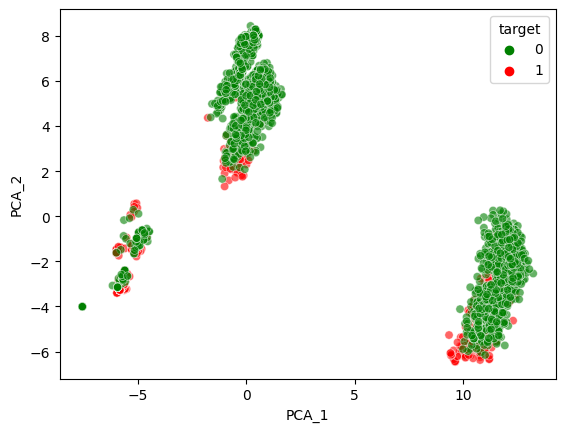

In [27]:
sns.scatterplot(x=new_dataset['PCA_1'],
                y=new_dataset['PCA_2'],
                hue=new_dataset['target'],
                palette=['g', 'r'],
               alpha =0.6)